#**Importing Necessary libraries**

* From keras library we are going to use image preprocessing task, to normalize the image pixel values in between 0 to 1.
* Model is imported to load variuos Neural NEtwrok models such as Sequential.
* We are going to use Stochastic Gradient Descent(SGD) as a optimizer 
* Keras layers such as Dense, Flatten, Conv2D and MaxPooling is used to implement the CNN model

In [1]:
from keras import applications
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [2]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from keras import Input

#**Loading the training and testing data and defining the basic parameters**
* We are resizing the input image to 128 * 128

* In the dataset :
    Training Set : 70% 
    Validation Set : 20%
    Test Set : 10%

In [3]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/plant_village/plant_village/train/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/plant_village/plant_village/val/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/AMITY/Deep Learning (codes)/Data/plant_village/plant_village/test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


Found 3002 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Found 546 images belonging to 4 classes.


# **Visualization of few images**

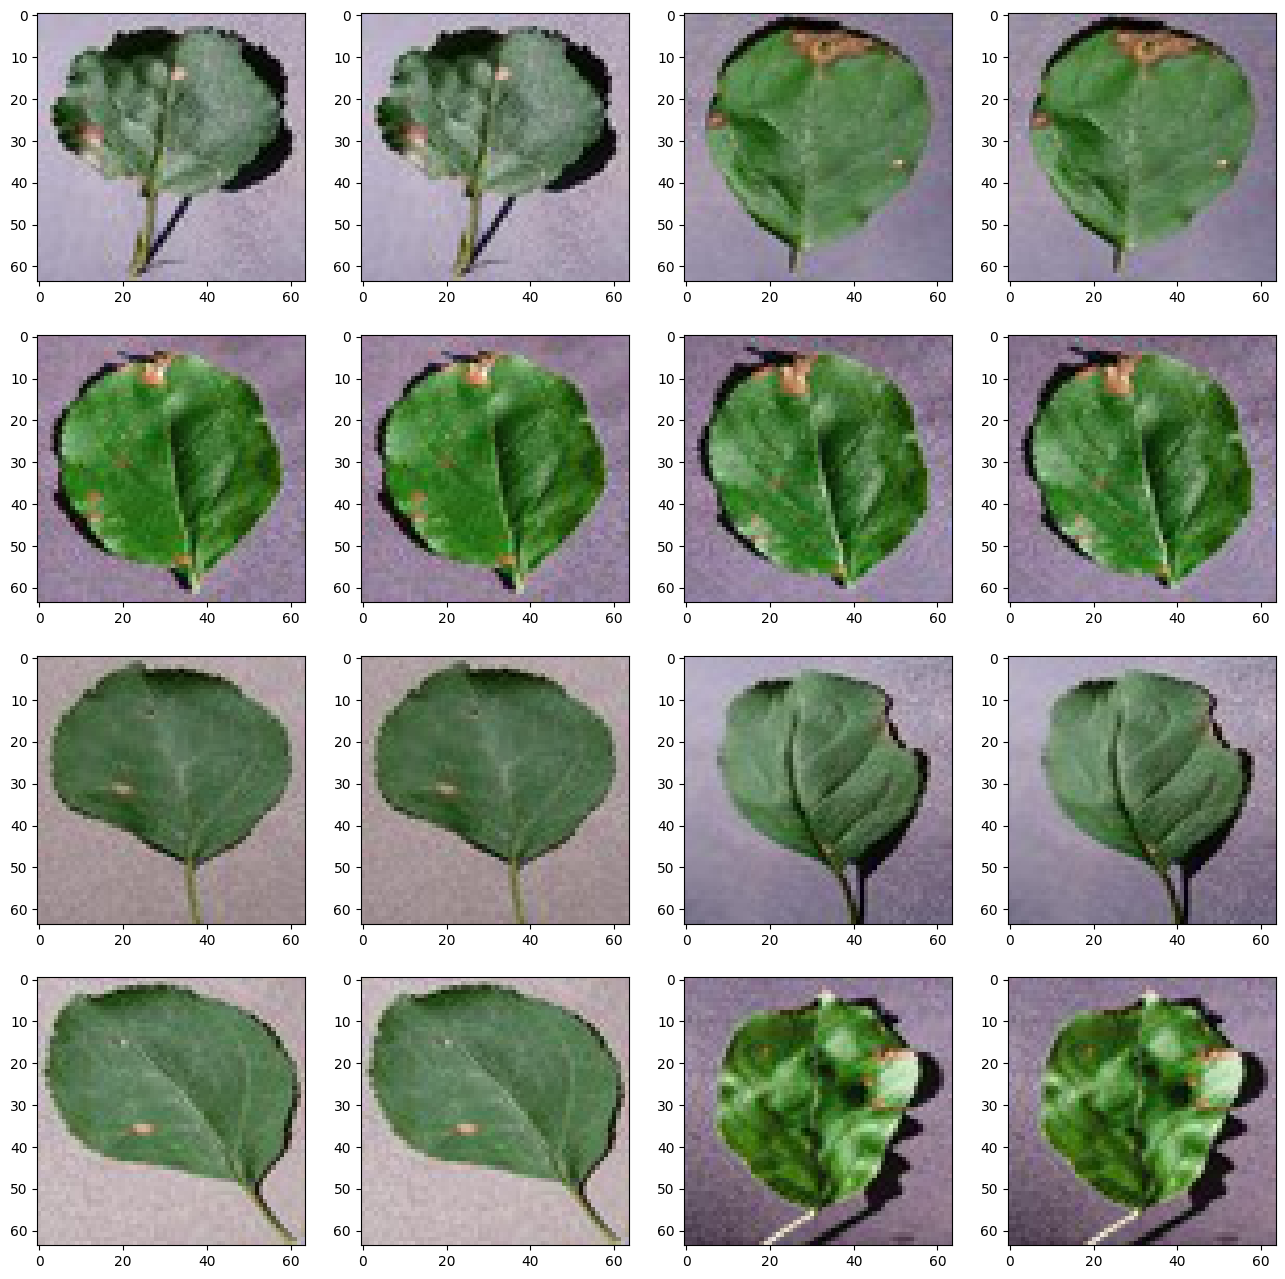

In [4]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next()
  # print(img.shape) 
  # print(label)  
  plt.imshow(img[0])
plt.show()

In [5]:
img, label = test_generator.next()
img[0].shape

(64, 64, 3)


# **Model Definition**

* We are going to use 2 convolution layers with 3*3 filer and relu as an activation function
* Then max pooling layer with 2*2 filter is used
* After that we are going to use Flatten layer
* Then Dense layer is used with relu function
* In the output layer softmax function is used with 4 neurons as we have four class dataset.
* model.summary() is used to check the overall architecture of the model with number of learnable parameters in each 


In [6]:
# Create the model
model = models.Sequential()
# Add new layers
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

#**Compiling and Training the Model**

In [7]:
# sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
187/187 [==============================] - 1985s 11s/step - loss: 0.8339 - acc: 0.6706 - val_loss: 0.4765 - val_acc: 0.8535
Epoch 2/30
187/187 [==============================] - 7s 38ms/step - loss: 0.4079 - acc: 0.8544 - val_loss: 0.4000 - val_acc: 0.8740
Epoch 3/30
187/187 [==============================] - 8s 41ms/step - loss: 0.2971 - acc: 0.8881 - val_loss: 0.2978 - val_acc: 0.9102
Epoch 4/30
187/187 [==============================] - 7s 38ms/step - loss: 0.2590 - acc: 0.9041 - val_loss: 0.3200 - val_acc: 0.8961
Epoch 5/30
187/187 [==============================] - 8s 40ms/step - loss: 0.1901 - acc: 0.9314 - val_loss: 0.2728 - val_acc: 0.9150
Epoch 6/30
187/187 [==============================] - 7s 40ms/step - loss: 0.1517 - acc: 0.9467 - val_loss: 0.3277 - val_acc: 0.8992
Epoch 7/30
187/187 [==============================] - 7s 38ms/step - loss: 0.1520 - acc: 0.9427 - val_loss: 0.3256 - val_acc: 0.9071
Epoch 8/30
187/187 [==============================] - 8s 41ms/step 

# **Saving the model**

In [8]:
model.save("CONV_plant_deseas.h5")
print("Saved model to disk")

Saved model to disk


# **Loading the model**

In [9]:
model = models.load_model('CONV_plant_deseas.h5')

#**Visualization of Accuracy and Loss Curves**

In [10]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

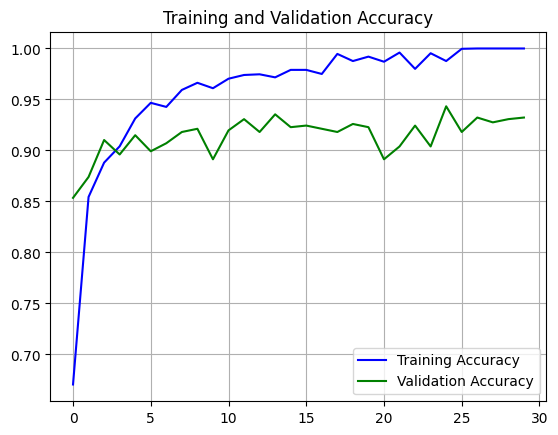

<Figure size 640x480 with 0 Axes>

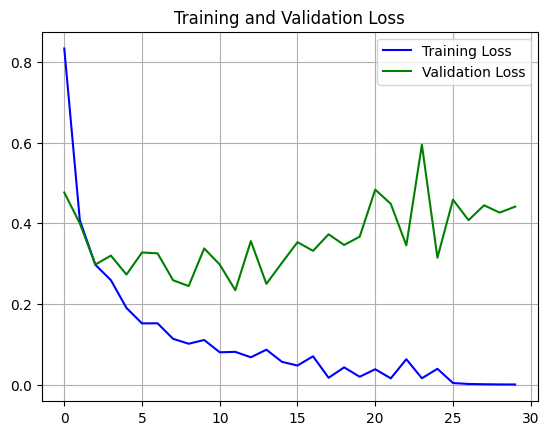

In [11]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

#**Prediction**

In [12]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


<ipython-input-12-1bdf1cd647ce>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


546/546 [==============================] - 249s 456ms/step
No of errors = 36/546


In [13]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

93.4065934065934

#**Confusion Matrix**

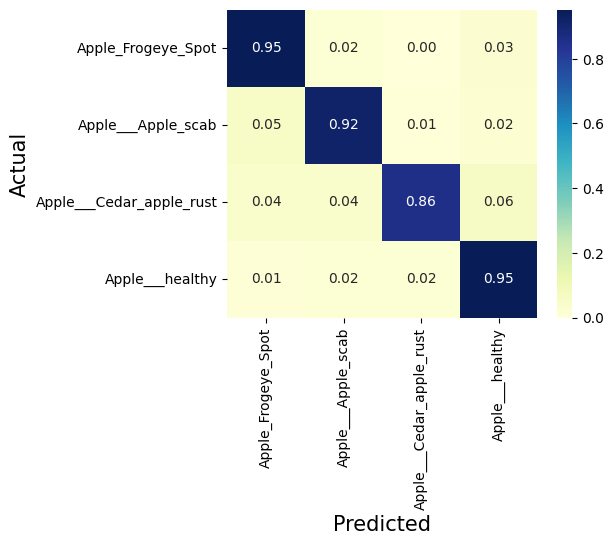

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)

#**Classification Report**

In [15]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes, target_names=label2index))

                          precision    recall  f1-score   support

      Apple_Frogeye_Spot       0.89      0.95      0.92       103
      Apple___Apple_scab       0.93      0.92      0.92       134
Apple___Cedar_apple_rust       0.88      0.86      0.87        49
         Apple___healthy       0.96      0.95      0.96       260

                accuracy                           0.93       546
               macro avg       0.92      0.92      0.92       546
            weighted avg       0.93      0.93      0.93       546



#**Finetuning Hyper-parameters**

In [ ]:
def create_model(learn_rate=0.01, momentum=0):
    image_size = 128
    input_shape = (image_size, image_size, 3)
    
    model = models.Sequential()
    model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    # model = Model(input_shape, x)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.SGD(lr=learn_rate, momentum=momentum),
                  metrics=['accuracy'])
    
    return model


In [ ]:
learn_rate = [1e-9, 1e-3]
momentum = [0.6, 0.9]


def try_fit(learn_rate,momentum):
    history_page=[]
    for lr in learn_rate:
        for moment in momentum:
            model = create_model(lr,moment)
            history = model.fit_generator(
                train_generator,
                epochs=1,
                validation_data=validation_generator)    
            history_page.append(history)
    return history_page

history_page = try_fit(learn_rate,momentum)
history_page[0].history['accuracy']

<ipython-input-26-491e2ac86ce5>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


188/188 [==============================] - 298s 2s/step - loss: 0.5418 - accuracy: 0.4460 - val_loss: 0.4854 - val_accuracy: 0.5181


[0.44170552492141724]